In [ ]:
#import library
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#menghilangkan catatan warning
warnings.filterwarnings('ignore')

# Exploring Data

In [ ]:
#membaca dataset
df = pd.read_csv("Housing.csv")

In [ ]:
#membaca 5 baris pertama data
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
#output jumlah baris dan kolom
df.shape

(545, 13)

In [ ]:
#output jumlah baris dan tipe data pada tiap kolom
df.info()
#tidak terdapat baris yang kosong pada tiap kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
#output jumlah data yang kosong pada tiap kolom
df.isnull().sum()
#tidak ada data yang kosong

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
#output jumlah data yang unik pada tiap kolom
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [ ]:
#membuat variabel baru untuk menyimpan kolom categorical 'yes' dan 'no'
cat_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for col in cat_columns:
    df[col] = df[col].replace({'yes' : 1, 'no' : 0})

print(df)

        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0           

In [ ]:
#membuat variabel baru untuk menyimpan kolom categorical 'yes' dan 'no'
cat_columns = ['furnishingstatus']

for col in cat_columns:
    df[col] = df[col].replace({'furnished' : 2, 'semi-furnished' : 1, 'unfurnished' : 0})

print(df)

        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0           

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [ ]:
#output descriptive statistics
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.930275
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


# Plotting Data

In [ ]:
#mengetahui jumlah tiap data unik pada kolom bedrooms
df['bedrooms'].value_counts()

3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64

In [ ]:
#mengetahui jumlah tiap data unik pada setiap kolom
for column in df.columns:
    print(column)
    print(df[column].value_counts())
    print('----------------------------------------')

price
3500000     17
4200000     17
4900000     12
3150000      9
5600000      9
            ..
6580000      1
4319000      1
4375000      1
4382000      1
13300000     1
Name: price, Length: 219, dtype: int64
----------------------------------------
area
6000    24
3000    14
4500    13
4000    11
5500     9
        ..
6862     1
4815     1
9166     1
6321     1
3620     1
Name: area, Length: 284, dtype: int64
----------------------------------------
bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64
----------------------------------------
bathrooms
1    401
2    133
3     10
4      1
Name: bathrooms, dtype: int64
----------------------------------------
stories
2    238
1    227
4     41
3     39
Name: stories, dtype: int64
----------------------------------------
mainroad
1    468
0     77
Name: mainroad, dtype: int64
----------------------------------------
guestroom
0    448
1     97
Name: guestroom, dtype: int64
--------------------------

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'mainroad'}>,
        <Axes: title={'center': 'guestroom'}>,
        <Axes: title={'center': 'basement'}>],
       [<Axes: title={'center': 'hotwaterheating'}>,
        <Axes: title={'center': 'airconditioning'}>,
        <Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'prefarea'}>],
       [<Axes: title={'center': 'furnishingstatus'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

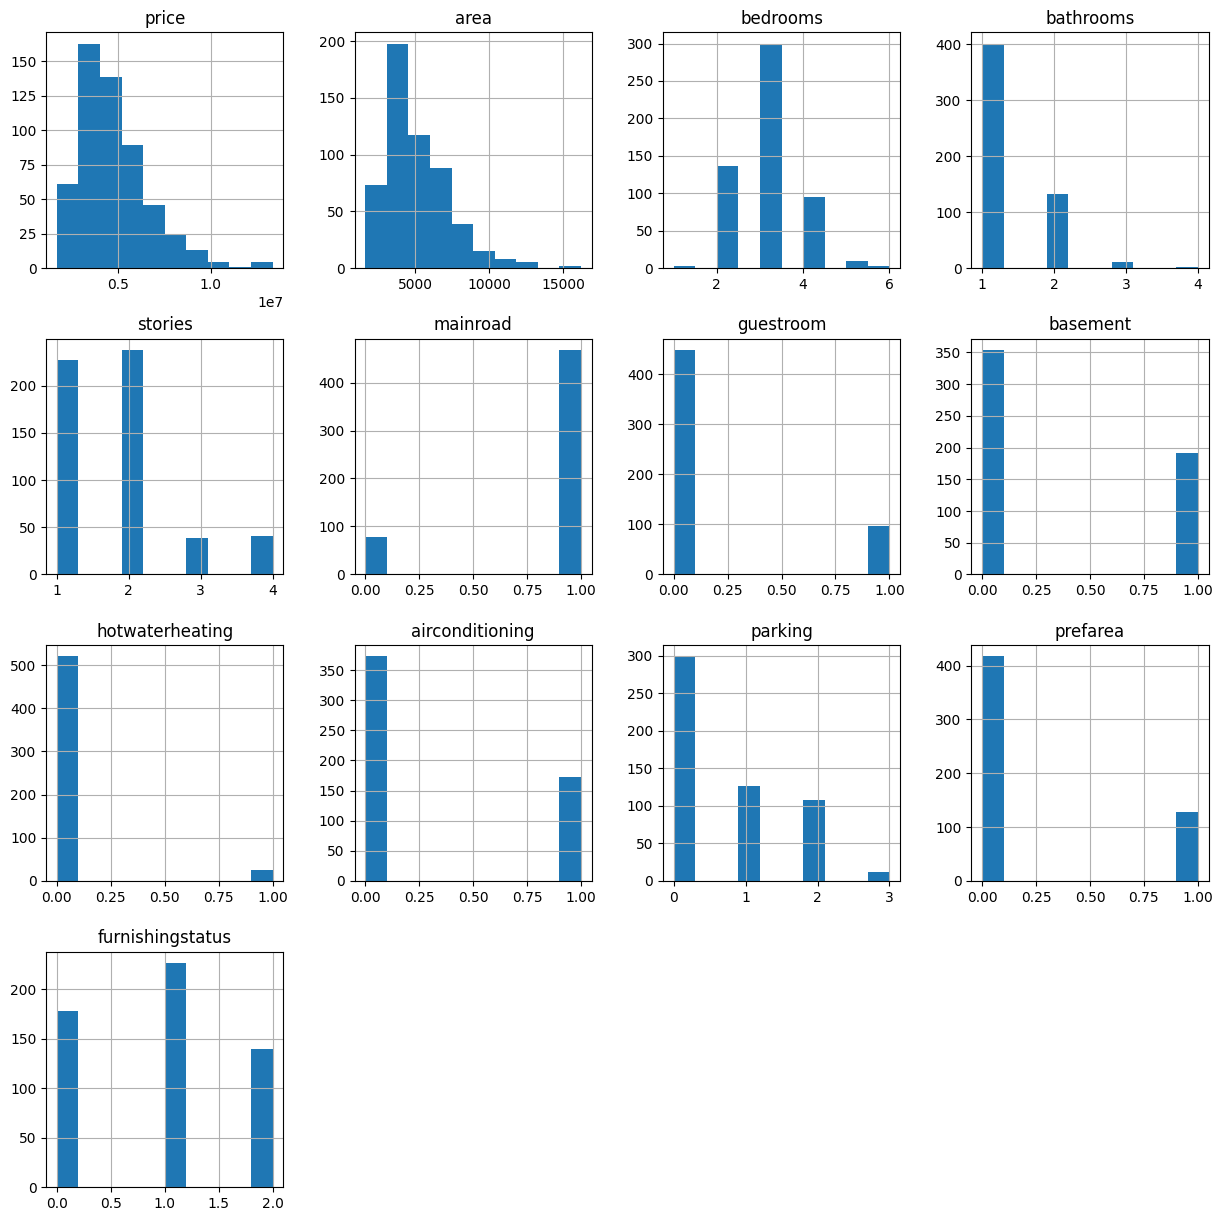

In [ ]:
#mengetahui jumlah tiap data unik pada semua kolom dalam bar chart
df.hist(figsize = (15, 15))

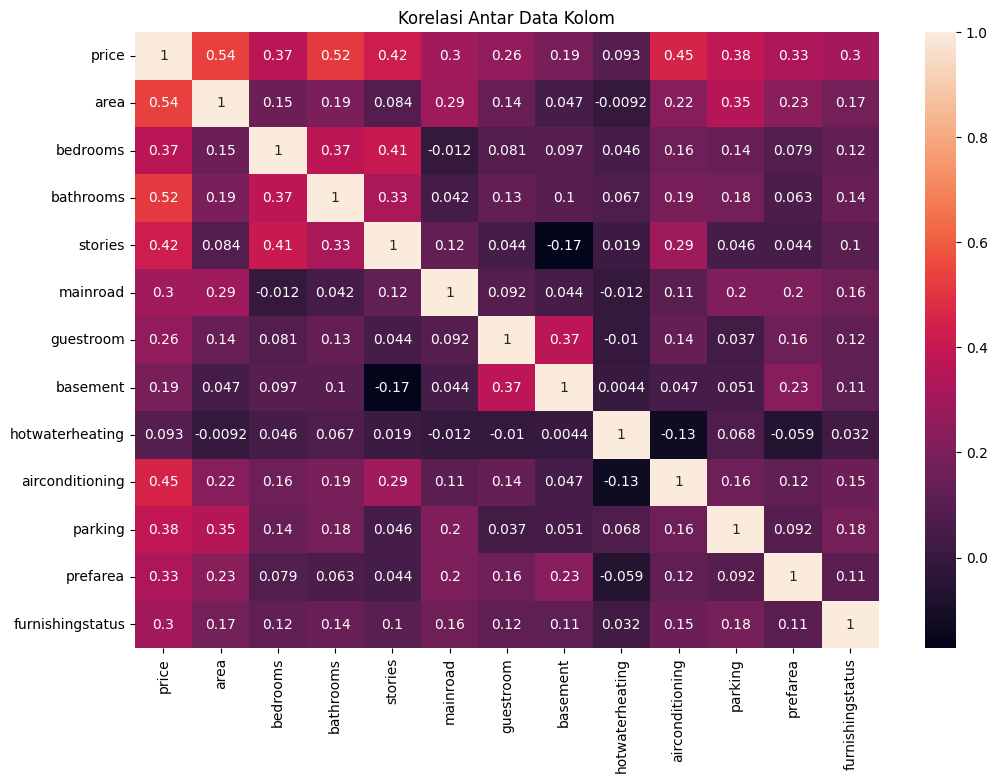

In [ ]:
#mengetahui korelasi antar data kolom
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(), annot = True)
plt.title("Korelasi Antar Data Kolom")
plt.show()

# Pre-Processing Data

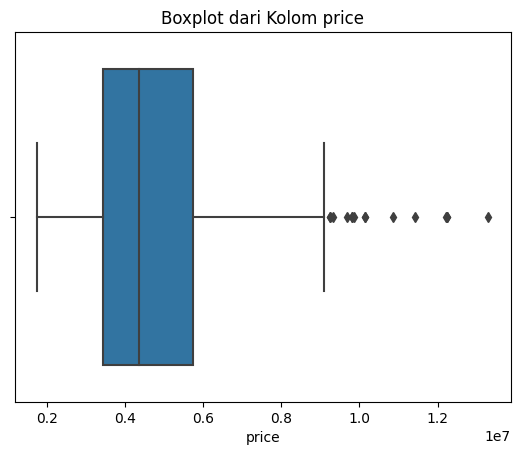

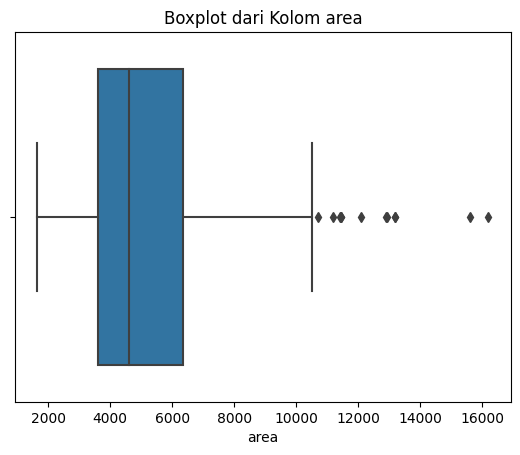

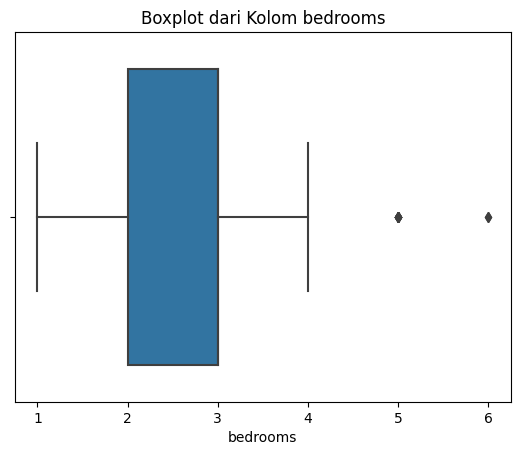

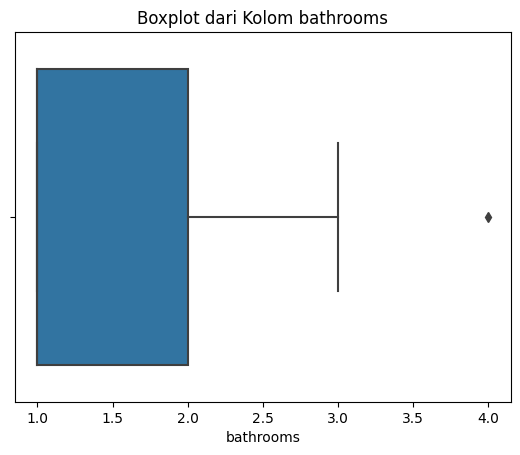

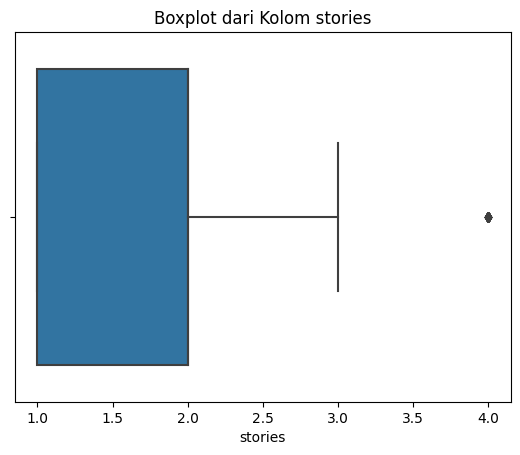

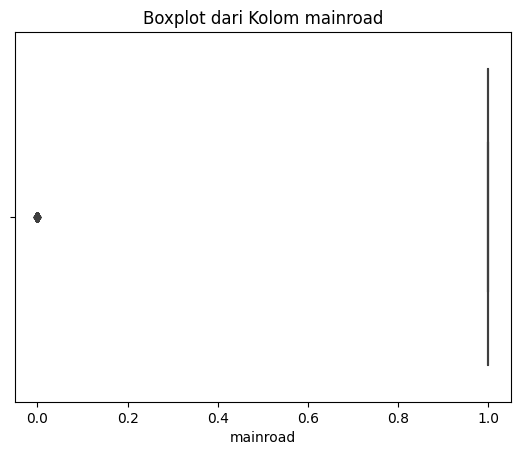

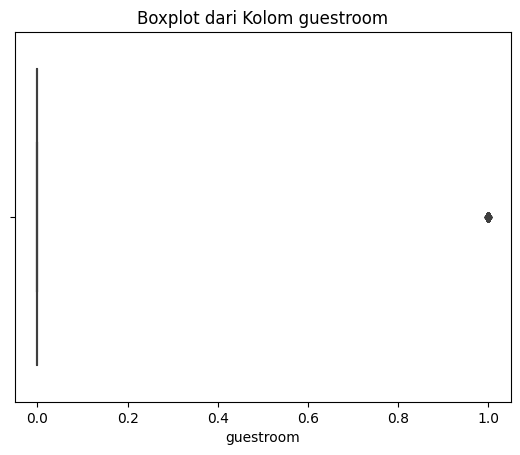

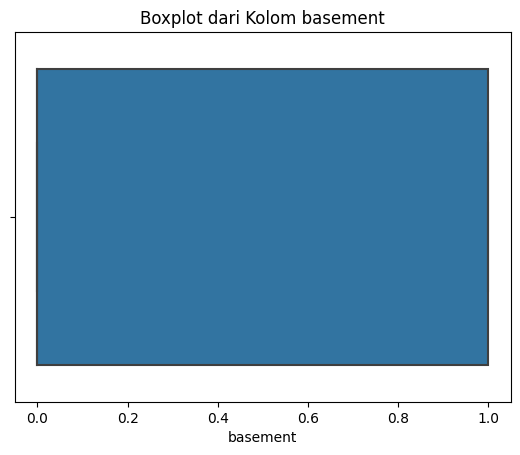

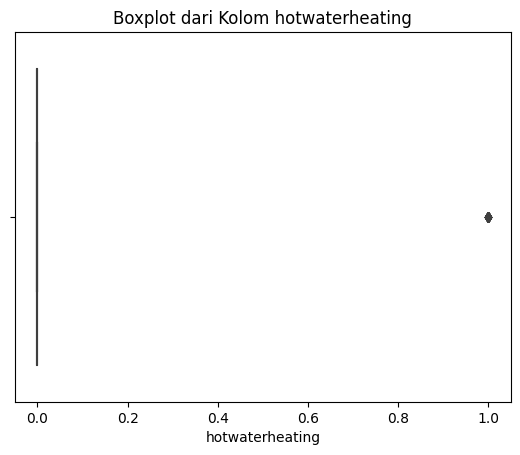

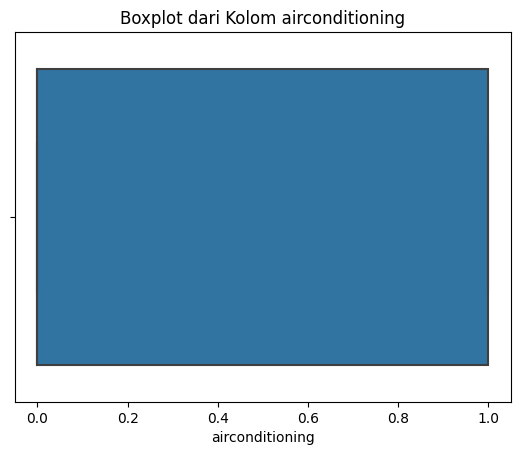

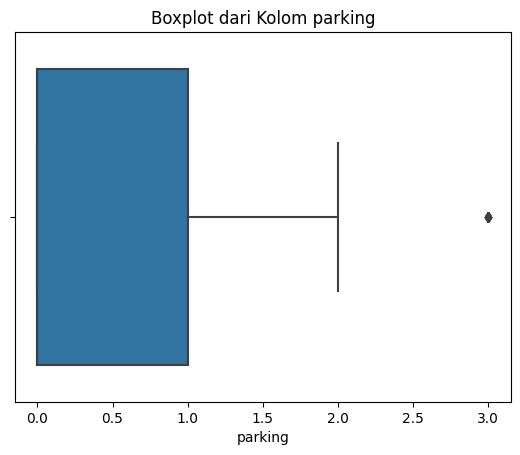

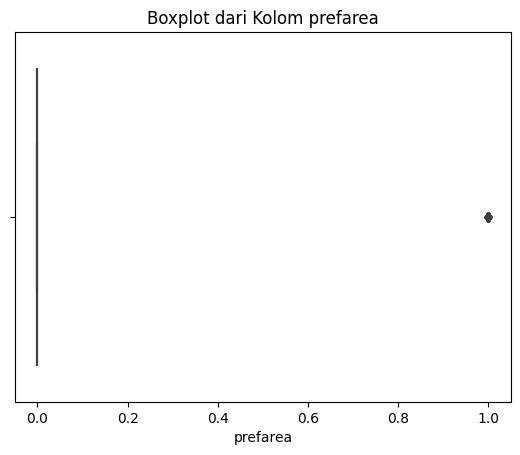

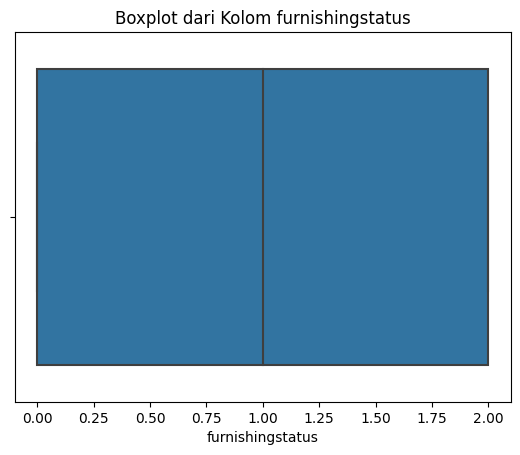

In [ ]:
for column in df.columns:
    sns.boxplot(x = df[column])
    plt.title(f'Boxplot dari Kolom {column}')
    plt.show()

## Menghilangkan outliers pada kolom numerik yang bukan merupakan angka rating atau jumlah

In [ ]:
column = 'price'
q1 = np.percentile(df[column], 25)
q3 = np.percentile(df[column], 75)
IQR = q3 - q1
batas_bawah = q1 - (1.5 * IQR)
batas_atas = q3 + (1.5 * IQR)
print(batas_bawah)
print(batas_atas)

df_clean = df[(df[column] >= batas_bawah) & (df[column] <= batas_atas)]
df_clean.shape

-35000.0
9205000.0


(530, 13)

In [ ]:
column = 'area'
q1 = np.percentile(df[column], 25)
q3 = np.percentile(df[column], 75)
IQR = q3 - q1
batas_bawah = q1 - (1.5 * IQR)
batas_atas = q3 + (1.5 * IQR)
print(batas_bawah)
print(batas_atas)

df_clean = df_clean[(df_clean[column] >= batas_bawah) & (df_clean[column] <= batas_atas)]
df_clean.shape

-540.0
10500.0


(520, 13)

In [ ]:
#membuat dataframe baru yang berisi fitur dengan nilai > 0.26
df2 = ['price', 'area', 'bathrooms', 'stories', 'airconditioning']
df2 = df_clean[df2]
df2.head()

,price,area,bathrooms,stories,airconditioning
15,9100000,6000,1,2,0
16,9100000,6600,2,2,1
17,8960000,8500,2,4,1
18,8890000,4600,2,2,1
19,8855000,6420,2,2,1


# Predicting Modelling Using Linear Regression

## price = a.area + b.bathrooms + c.stories + d.airconditioning + e.parking

In [ ]:
#import library
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
#membagi data menjadi fitur X dan target Y
X = df_clean[['area', 'bathrooms', 'stories', 'airconditioning', 'parking']]
y = df_clean['price']

In [ ]:
#membagi data menjadi data latihan dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#membuat model
LR_Model = LinearRegression()

#melatih model
LR_Model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#mengetahui bobot koefisien yang dihasilkan oleh model untuk menggambarkan
#hubungan antara variabel independen (fitur) dengan variabel dependen (target)
LR_Model.coef_

array([2.98657325e+02, 9.18493294e+05, 4.68528173e+05, 8.52445863e+05,
       2.47529938e+05])

In [ ]:
#output 5 data pertama pada X_test
X_test.head()

,area,bathrooms,stories,airconditioning,parking
447,3500,1,1,0,0
127,6500,2,3,1,0
277,10360,1,1,0,1
259,6360,1,1,1,1
335,3816,1,1,1,2


In [ ]:
#testing set pada y
y_test

447    3150000
127    5880000
277    4305000
259    4473000
335    3920000
        ...   
263    4410000
493    2800000
67     6895000
119    5950000
176    5250000
Name: price, Length: 104, dtype: int64

In [ ]:
#memprediksi y
y_pred = LR_Model.predict(X_test)

In [ ]:
#menghitung mse dan rmse
mse = mean_squared_error (y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

919398040963.9688
958852.460477611


In [ ]:
#menghitung mae
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(mae)

736616.7222833455


In [ ]:
#menghitung r-squared
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)
print(r_squared)

0.6071693009854068


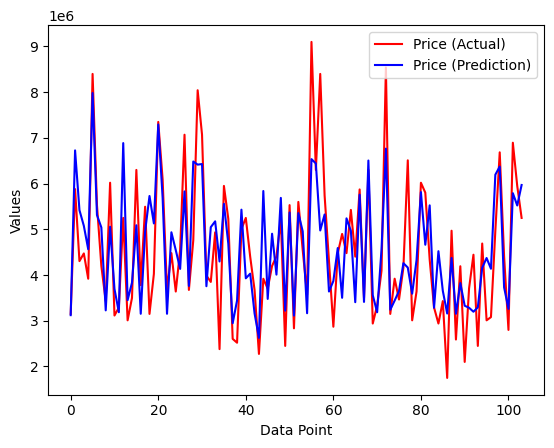

In [ ]:
#membuat plot untuk data aktual dan prediksi
plt.plot(np.arange(0, len(y_test)), y_test, label = "Price (Actual)", color = 'red')
plt.plot(np.arange(0, len(y_pred)), y_pred, label = "Price (Prediction)", color = 'blue')

plt.xlabel("Data Point")
plt.ylabel("Values")
plt.legend()
plt.show()

# Predicting Modelling Using KNN

In [ ]:
#import library
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
#membuat model
KNN_Model = KNeighborsRegressor(n_neighbors = 3)

#melatih model
KNN_Model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
#output 5 data pertama pada X_test
X_test.head()

,area,bathrooms,stories,airconditioning,parking
447,3500,1,1,0,0
127,6500,2,3,1,0
277,10360,1,1,0,1
259,6360,1,1,1,1
335,3816,1,1,1,2


In [ ]:
#testing set pada y
y_test

447    3150000
127    5880000
277    4305000
259    4473000
335    3920000
        ...   
263    4410000
493    2800000
67     6895000
119    5950000
176    5250000
Name: price, Length: 104, dtype: int64

In [ ]:
#memprediksi y
y_pred = KNN_Model.predict(X_test)

In [ ]:
#menghitung mse dan rmse
mse = mean_squared_error (y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

1671692677083.3335
1292939.54888979


In [ ]:
#menghitung mae
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(mae)

1014495.1923076923


In [ ]:
#menghitung r-squared
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)
print(r_squared)

0.28573678252816903


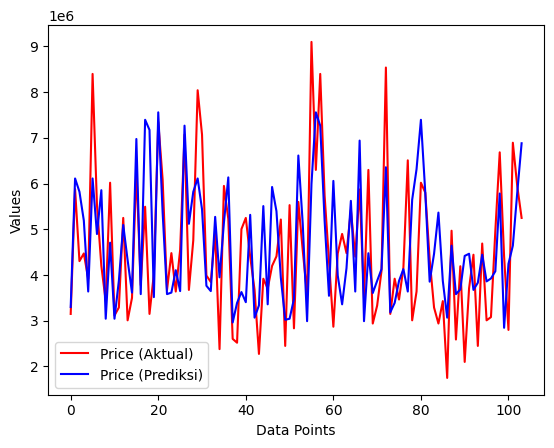

In [ ]:
#membuat plot untuk data aktual dan prediksi
plt.plot(np.arange(0, len(y_test)), y_test, label = "Price (Aktual)", color = 'red')
plt.plot(np.arange(0, len(y_pred)), y_pred, label = "Price (Prediksi)", color = 'blue')

plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()
plt.show()

# Predicting Modelling Using Decision Tree

In [ ]:
#import library
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#membuat model
DT_Model = DecisionTreeRegressor(max_depth = 5)

#melatih model
DT_Model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
#output 5 data pertama pada X_test
X_test.head()

,area,bathrooms,stories,airconditioning,parking
447,3500,1,1,0,0
127,6500,2,3,1,0
277,10360,1,1,0,1
259,6360,1,1,1,1
335,3816,1,1,1,2


In [ ]:
#output testing set pada y
y_test

447    3150000
127    5880000
277    4305000
259    4473000
335    3920000
        ...   
263    4410000
493    2800000
67     6895000
119    5950000
176    5250000
Name: price, Length: 104, dtype: int64

In [ ]:
#memprediksi y
y_pred = DT_Model.predict(X_test)

In [ ]:
#menghitung mse dan rmse
mse = mean_squared_error (y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

1312301963383.3135
1145557.4902130899


In [ ]:
#menghitung mae
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(mae)

869808.0557017052


In [ ]:
#menghitung r-squared
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)
print(r_squared)

0.4392934565603527


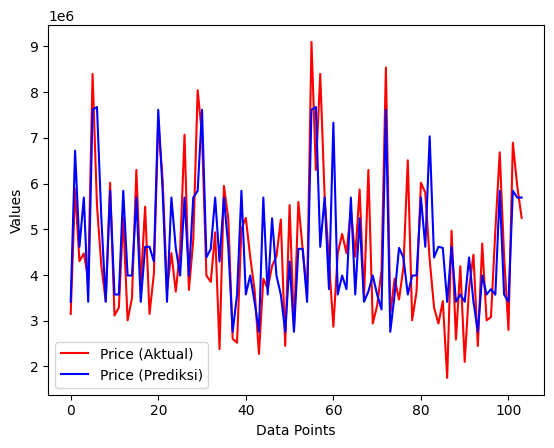

In [ ]:
#membuat plot untuk data aktual dan prediksi
plt.plot(np.arange(0, len(y_test)), y_test, label = "Price (Aktual)", color = 'red')
plt.plot(np.arange(0, len(y_pred)), y_pred, label = "Price (Prediksi)", color = 'blue')

plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()
plt.show()

K MEANS


In [ ]:
df_encode = {"mainroad" : {"yes" : 1, "no" : 0 }, "guestroom" : {"yes" : 1, "no" : 0 }, "basement" : {"yes" : 1, "no" : 0 }, "hotwaterheating" : {"yes" : 1, "no" : 0 },"airconditioning" : {"yes" : 1, "no" : 0 }, "prefarea" : {"yes" : 1, "no" : 0 }, "furnishingstatus" : {"furnished" : 2, "semi-furnished" : 1, "unfurnished" : 0}}
df = df.replace(df_encode)

In [ ]:
import matplotlib.pyplot as plt

def create_pie_chart(labels, sizes):
    # Membuat pie chart
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    ax1.axis('equal') # Mengatur skala agar pie chart merupakan lingkaran
    plt.title('Korelasi antara Price dan Fitur Lain')
    plt.show()

In [ ]:
correlation = df.corr()['price'].drop('price')

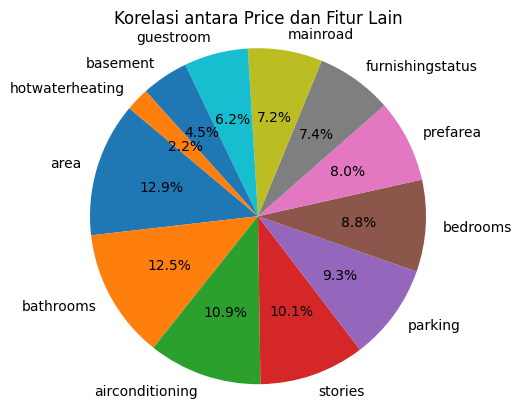

In [ ]:
# Mengurutkan data berdasarkan nilai korelasi
correlation = correlation.sort_values(ascending=False)

# Membuat pie chart
create_pie_chart(labels=correlation.index, sizes=correlation.values)

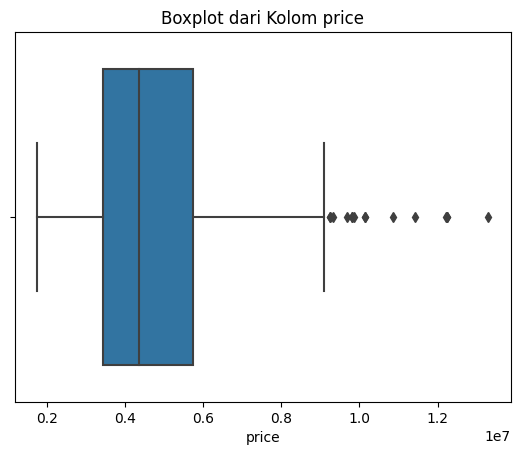

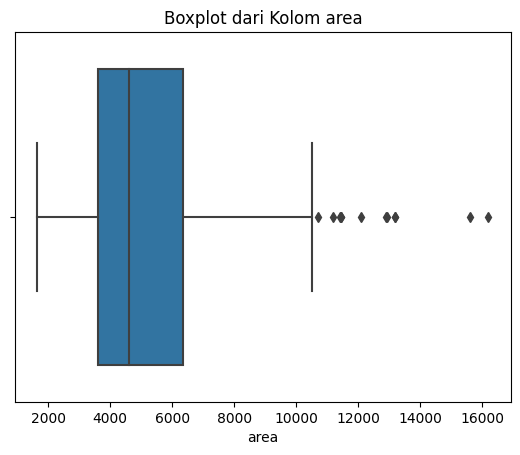

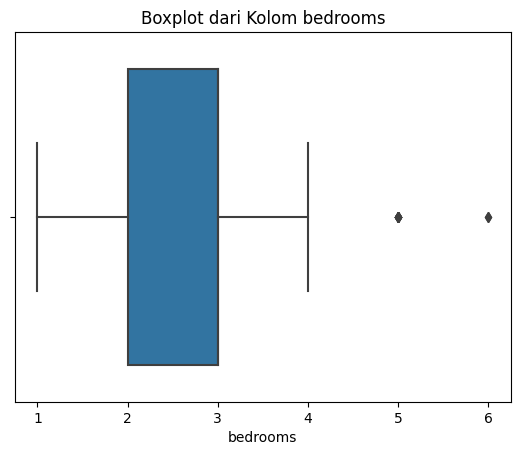

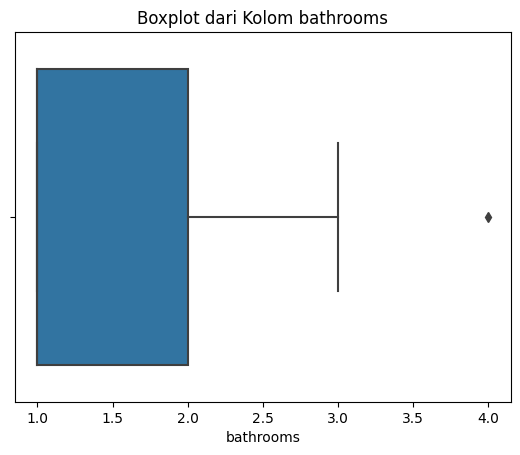

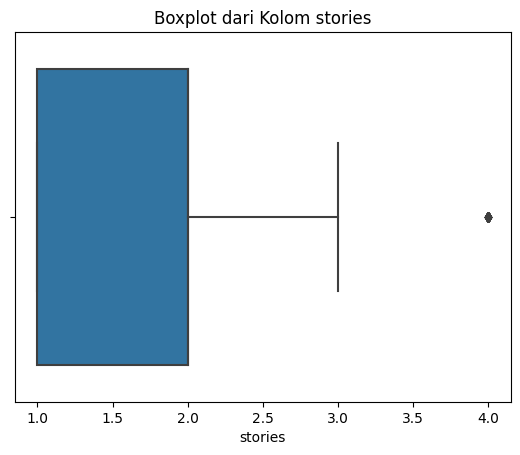

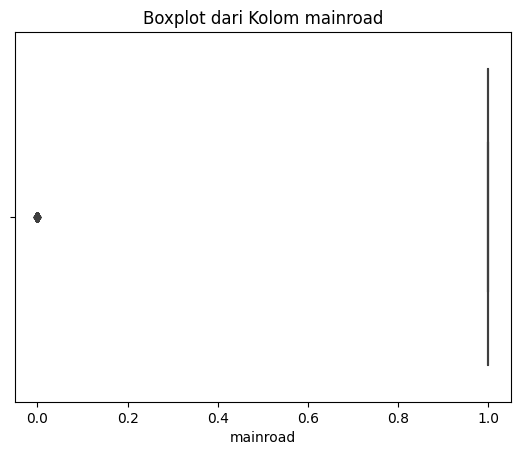

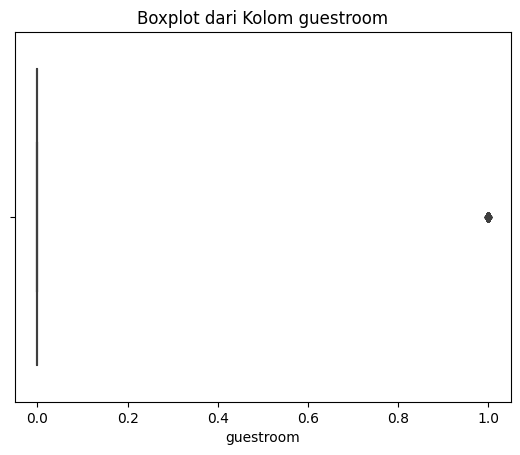

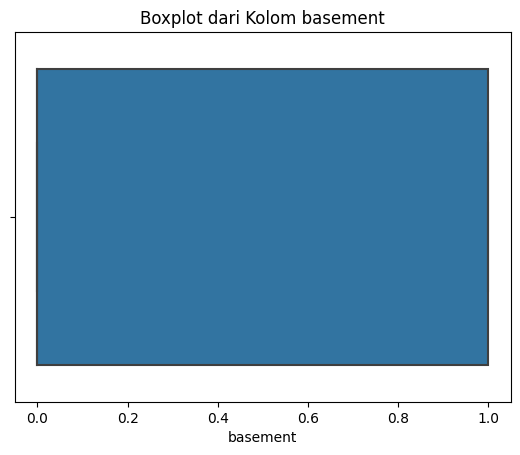

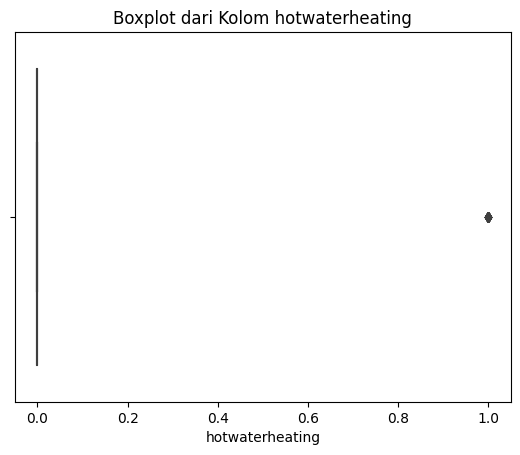

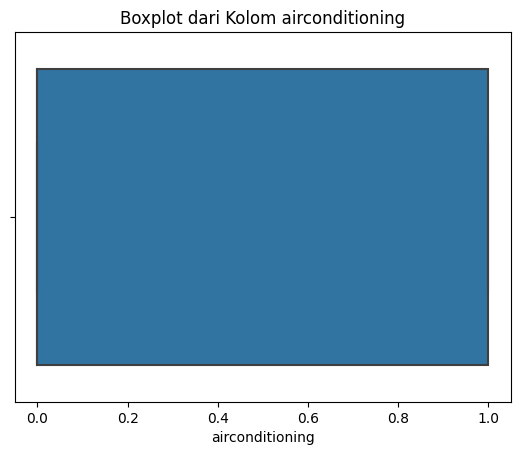

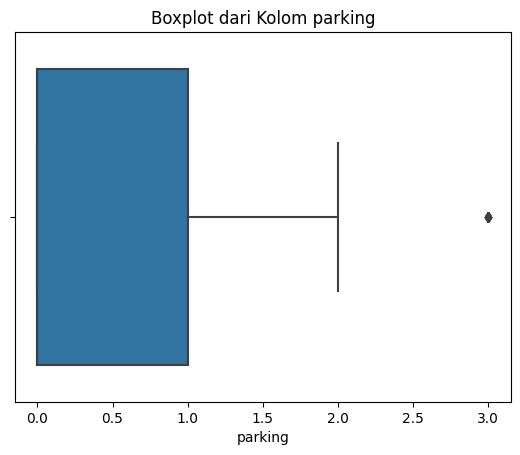

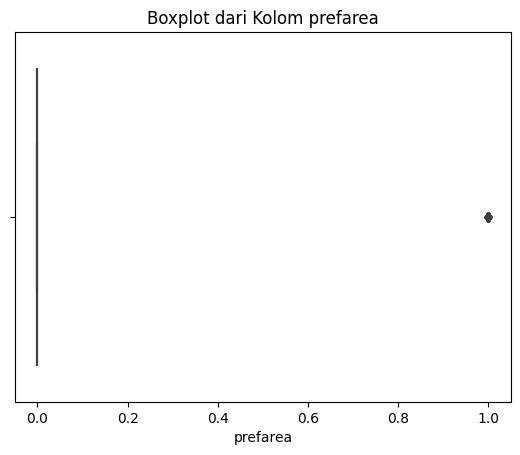

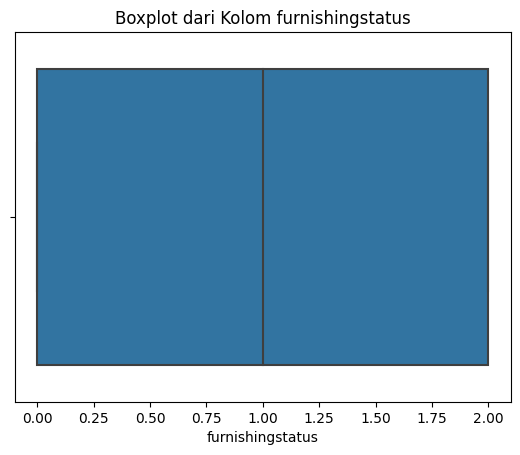

In [ ]:
for column in df.columns:
    sns.boxplot(x = df[column])
    plt.title(f'Boxplot dari Kolom {column}')
    plt.show()

In [ ]:
column = 'price'
q1 = np.percentile(df[column], 25)
q3 = np.percentile(df[column], 75)
IQR = q3 - q1
batas_bawah = q1 - (1.5 * IQR)
batas_atas = q3 + (1.5 * IQR)
print(batas_bawah)
print(batas_atas)

df_clean = df[(df[column] >= batas_bawah) & (df[column] <= batas_atas)]
df_clean.shape

-35000.0
9205000.0


(530, 13)

In [ ]:
column = 'area'
q1 = np.percentile(df[column], 25)
q3 = np.percentile(df[column], 75)
IQR = q3 - q1
batas_bawah = q1 - (1.5 * IQR)
batas_atas = q3 + (1.5 * IQR)
print(batas_bawah)
print(batas_atas)

df_clean = df_clean[(df_clean[column] >= batas_bawah) & (df_clean[column] <= batas_atas)]
df_clean.shape

-540.0
10500.0


(520, 13)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df3 = pd.get_dummies(df,columns = ['bathrooms', 'airconditioning'])
df4 = pd.get_dummies(df,columns = ['bathrooms', 'stories'])
df5 = pd.get_dummies(df,columns = ['bathrooms', 'parking'])
df6 = pd.get_dummies(df,columns = ['airconditioning', 'stories'])
df7 = pd.get_dummies(df,columns = ['airconditioning', 'parking'])
df8 = pd.get_dummies(df,columns = ['stories', 'parking'])

In [ ]:
df3.columns

Index(['price', 'area', 'bedrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'parking', 'prefarea',
       'furnishingstatus', 'bathrooms_1', 'bathrooms_2', 'bathrooms_3',
       'bathrooms_4', 'airconditioning_0', 'airconditioning_1'],
      dtype='object')

In [ ]:
df3_input = df3[['price', 'area', 'bedrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'parking', 'prefarea',
       'furnishingstatus', 'bathrooms_1', 'bathrooms_2', 'bathrooms_3',
       'bathrooms_4', 'airconditioning_0', 'airconditioning_1']]

In [ ]:
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    cluster_label=kmeanModel.fit_predict(df3_input)
    #calculate silhouette_score for each cluster
    silhouette_avg = metrics.silhouette_score(df3_input, cluster_label)
    print(
        "For n_clusters =",k,
        "The average silhouette_score is :",silhouette_avg,
        )
    distortions.append(kmeanModel.inertia_)

For n_clusters = 2 The average silhouette_score is : 0.6151371089512497
For n_clusters = 3 The average silhouette_score is : 0.5607074949421896
For n_clusters = 4 The average silhouette_score is : 0.54835565385705
For n_clusters = 5 The average silhouette_score is : 0.5518247622467041
For n_clusters = 6 The average silhouette_score is : 0.5368163103551884
For n_clusters = 7 The average silhouette_score is : 0.5358731360258815
For n_clusters = 8 The average silhouette_score is : 0.5421936782446206
For n_clusters = 9 The average silhouette_score is : 0.5314243677139378


In [ ]:
kmeanModel = KMeans(n_clusters=2)
kmeanModel.fit(df3_input)

KMeans(n_clusters=2)

In [ ]:
df3['k_means']=kmeanModel.predict(df3_input)

In [ ]:
df3['k_means'].value_counts()

0    381
1    164
Name: k_means, dtype: int64

In [ ]:
df4.columns

Index(['price', 'area', 'bedrooms', 'mainroad', 'guestroom', 'basement',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus', 'bathrooms_1', 'bathrooms_2', 'bathrooms_3',
       'bathrooms_4', 'stories_1', 'stories_2', 'stories_3', 'stories_4'],
      dtype='object')

In [ ]:
df5.columns

Index(['price', 'area', 'bedrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'prefarea',
       'furnishingstatus', 'bathrooms_1', 'bathrooms_2', 'bathrooms_3',
       'bathrooms_4', 'parking_0', 'parking_1', 'parking_2', 'parking_3'],
      dtype='object')

In [ ]:
df6.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'parking', 'prefarea',
       'furnishingstatus', 'airconditioning_0', 'airconditioning_1',
       'stories_1', 'stories_2', 'stories_3', 'stories_4'],
      dtype='object')

In [ ]:
df7.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'prefarea',
       'furnishingstatus', 'airconditioning_0', 'airconditioning_1',
       'parking_0', 'parking_1', 'parking_2', 'parking_3'],
      dtype='object')

In [ ]:
df8.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'prefarea',
       'furnishingstatus', 'stories_1', 'stories_2', 'stories_3', 'stories_4',
       'parking_0', 'parking_1', 'parking_2', 'parking_3'],
      dtype='object')

In [ ]:
df4_input = df4[['price', 'area', 'bedrooms', 'mainroad', 'guestroom', 'basement',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus', 'bathrooms_1', 'bathrooms_2', 'bathrooms_3',
       'bathrooms_4', 'stories_1', 'stories_2', 'stories_3', 'stories_4']]

In [ ]:
df5_input = df5[['price', 'area', 'bedrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'prefarea',
       'furnishingstatus', 'bathrooms_1', 'bathrooms_2', 'bathrooms_3',
       'bathrooms_4', 'parking_0', 'parking_1', 'parking_2', 'parking_3']]

In [ ]:
df6_input = df6[['price', 'area', 'bedrooms', 'bathrooms', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'parking', 'prefarea',
       'furnishingstatus', 'airconditioning_0', 'airconditioning_1',
       'stories_1', 'stories_2', 'stories_3', 'stories_4']]

In [ ]:
df7_input = df7[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'prefarea',
       'furnishingstatus', 'airconditioning_0', 'airconditioning_1',
       'parking_0', 'parking_1', 'parking_2', 'parking_3']]

In [ ]:
df8_input = df8[['price', 'area', 'bedrooms', 'bathrooms', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'prefarea',
       'furnishingstatus', 'stories_1', 'stories_2', 'stories_3', 'stories_4',
       'parking_0', 'parking_1', 'parking_2', 'parking_3']]

In [ ]:
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    cluster_label=kmeanModel.fit_predict(df4_input)
    #calculate silhouette_score for each cluster
    silhouette_avg = metrics.silhouette_score(df4_input, cluster_label)
    print(
        "For n_clusters =",k,
        "The average silhouette_score is :",silhouette_avg,
        )
    distortions.append(kmeanModel.inertia_)

For n_clusters = 2 The average silhouette_score is : 0.6151371089727413
For n_clusters = 3 The average silhouette_score is : 0.5609878022241167
For n_clusters = 4 The average silhouette_score is : 0.548355653899947
For n_clusters = 5 The average silhouette_score is : 0.5461958285817758
For n_clusters = 6 The average silhouette_score is : 0.5354158187557974
For n_clusters = 7 The average silhouette_score is : 0.5369460231514367
For n_clusters = 8 The average silhouette_score is : 0.5322150003743042
For n_clusters = 9 The average silhouette_score is : 0.5326997830293719


In [ ]:
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    cluster_label=kmeanModel.fit_predict(df5_input)
    #calculate silhouette_score for each cluster
    silhouette_avg = metrics.silhouette_score(df5_input, cluster_label)
    print(
        "For n_clusters =",k,
        "The average silhouette_score is :",silhouette_avg,
        )
    distortions.append(kmeanModel.inertia_)

For n_clusters = 2 The average silhouette_score is : 0.6151371089520173
For n_clusters = 3 The average silhouette_score is : 0.5607074949411034
For n_clusters = 4 The average silhouette_score is : 0.5483556538655219
For n_clusters = 5 The average silhouette_score is : 0.5442483616619186
For n_clusters = 6 The average silhouette_score is : 0.5340639600260695
For n_clusters = 7 The average silhouette_score is : 0.5386574702758427
For n_clusters = 8 The average silhouette_score is : 0.5405817031070614
For n_clusters = 9 The average silhouette_score is : 0.5344814424870594


In [ ]:
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    cluster_label=kmeanModel.fit_predict(df6_input)
    #calculate silhouette_score for each cluster
    silhouette_avg = metrics.silhouette_score(df6_input, cluster_label)
    print(
        "For n_clusters =",k,
        "The average silhouette_score is :",silhouette_avg,
        )
    distortions.append(kmeanModel.inertia_)

For n_clusters = 2 The average silhouette_score is : 0.6151371089761382
For n_clusters = 3 The average silhouette_score is : 0.5607074950099619
For n_clusters = 4 The average silhouette_score is : 0.5483556539076002
For n_clusters = 5 The average silhouette_score is : 0.5442483617730135
For n_clusters = 6 The average silhouette_score is : 0.5354227935701944
For n_clusters = 7 The average silhouette_score is : 0.5354562438281817
For n_clusters = 8 The average silhouette_score is : 0.5338912187210468
For n_clusters = 9 The average silhouette_score is : 0.5356956118106189


In [ ]:
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    cluster_label=kmeanModel.fit_predict(df7_input)
    #calculate silhouette_score for each cluster
    silhouette_avg = metrics.silhouette_score(df7_input, cluster_label)
    print(
        "For n_clusters =",k,
        "The average silhouette_score is :",silhouette_avg,
        )
    distortions.append(kmeanModel.inertia_)

For n_clusters = 2 The average silhouette_score is : 0.6151371089563964
For n_clusters = 3 The average silhouette_score is : 0.5607074949522688
For n_clusters = 4 The average silhouette_score is : 0.5483556538756119
For n_clusters = 5 The average silhouette_score is : 0.5442483616822904
For n_clusters = 6 The average silhouette_score is : 0.5272433369602515
For n_clusters = 7 The average silhouette_score is : 0.5357258725546876
For n_clusters = 8 The average silhouette_score is : 0.5421936782964417
For n_clusters = 9 The average silhouette_score is : 0.5292821627780091


In [ ]:
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    cluster_label=kmeanModel.fit_predict(df8_input)
    #calculate silhouette_score for each cluster
    silhouette_avg = metrics.silhouette_score(df8_input, cluster_label)
    print(
        "For n_clusters =",k,
        "The average silhouette_score is :",silhouette_avg,
        )
    distortions.append(kmeanModel.inertia_)

For n_clusters = 2 The average silhouette_score is : 0.6151371089770353
For n_clusters = 3 The average silhouette_score is : 0.5607074950095056
For n_clusters = 4 The average silhouette_score is : 0.5468409424969287
For n_clusters = 5 The average silhouette_score is : 0.5461958286049179
For n_clusters = 6 The average silhouette_score is : 0.5225945661916622
For n_clusters = 7 The average silhouette_score is : 0.5342012148958191
For n_clusters = 8 The average silhouette_score is : 0.5379941176059956
For n_clusters = 9 The average silhouette_score is : 0.5331668418340633
